### **Import Needed Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder

### **Read Data**
**This data is about House price prediction competition, download from this [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv)**

In [2]:
data_original = pd.read_csv(r'houses.csv')
data= data_original.copy()

In [3]:
print(data.shape)
data.head(10)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **Calculate missing values**

In [5]:
nan_cols = (data.isnull().sum()/len(data)).sort_values(ascending=False)
nan_cols.head()

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64

### **Drop missing values more than 50%**

In [6]:
data = data.drop(columns=nan_cols[nan_cols>0.5].index)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


### **Filling missing values in FireplaceQu column with 0**

In [7]:
data['FireplaceQu'].fillna(0,inplace=True)
data['FireplaceQu'].isnull().sum()

0

### **Select Numerical data**

In [8]:
numerical_data = data.select_dtypes(include=['number'])
print(numerical_data.shape)
numerical_data.head()

(1460, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# drop ID column before plotting
data = data.drop(columns=['Id'])
numerical_data = numerical_data.drop(columns=['Id'])


### **Plot the distribution for all the numerical features.**

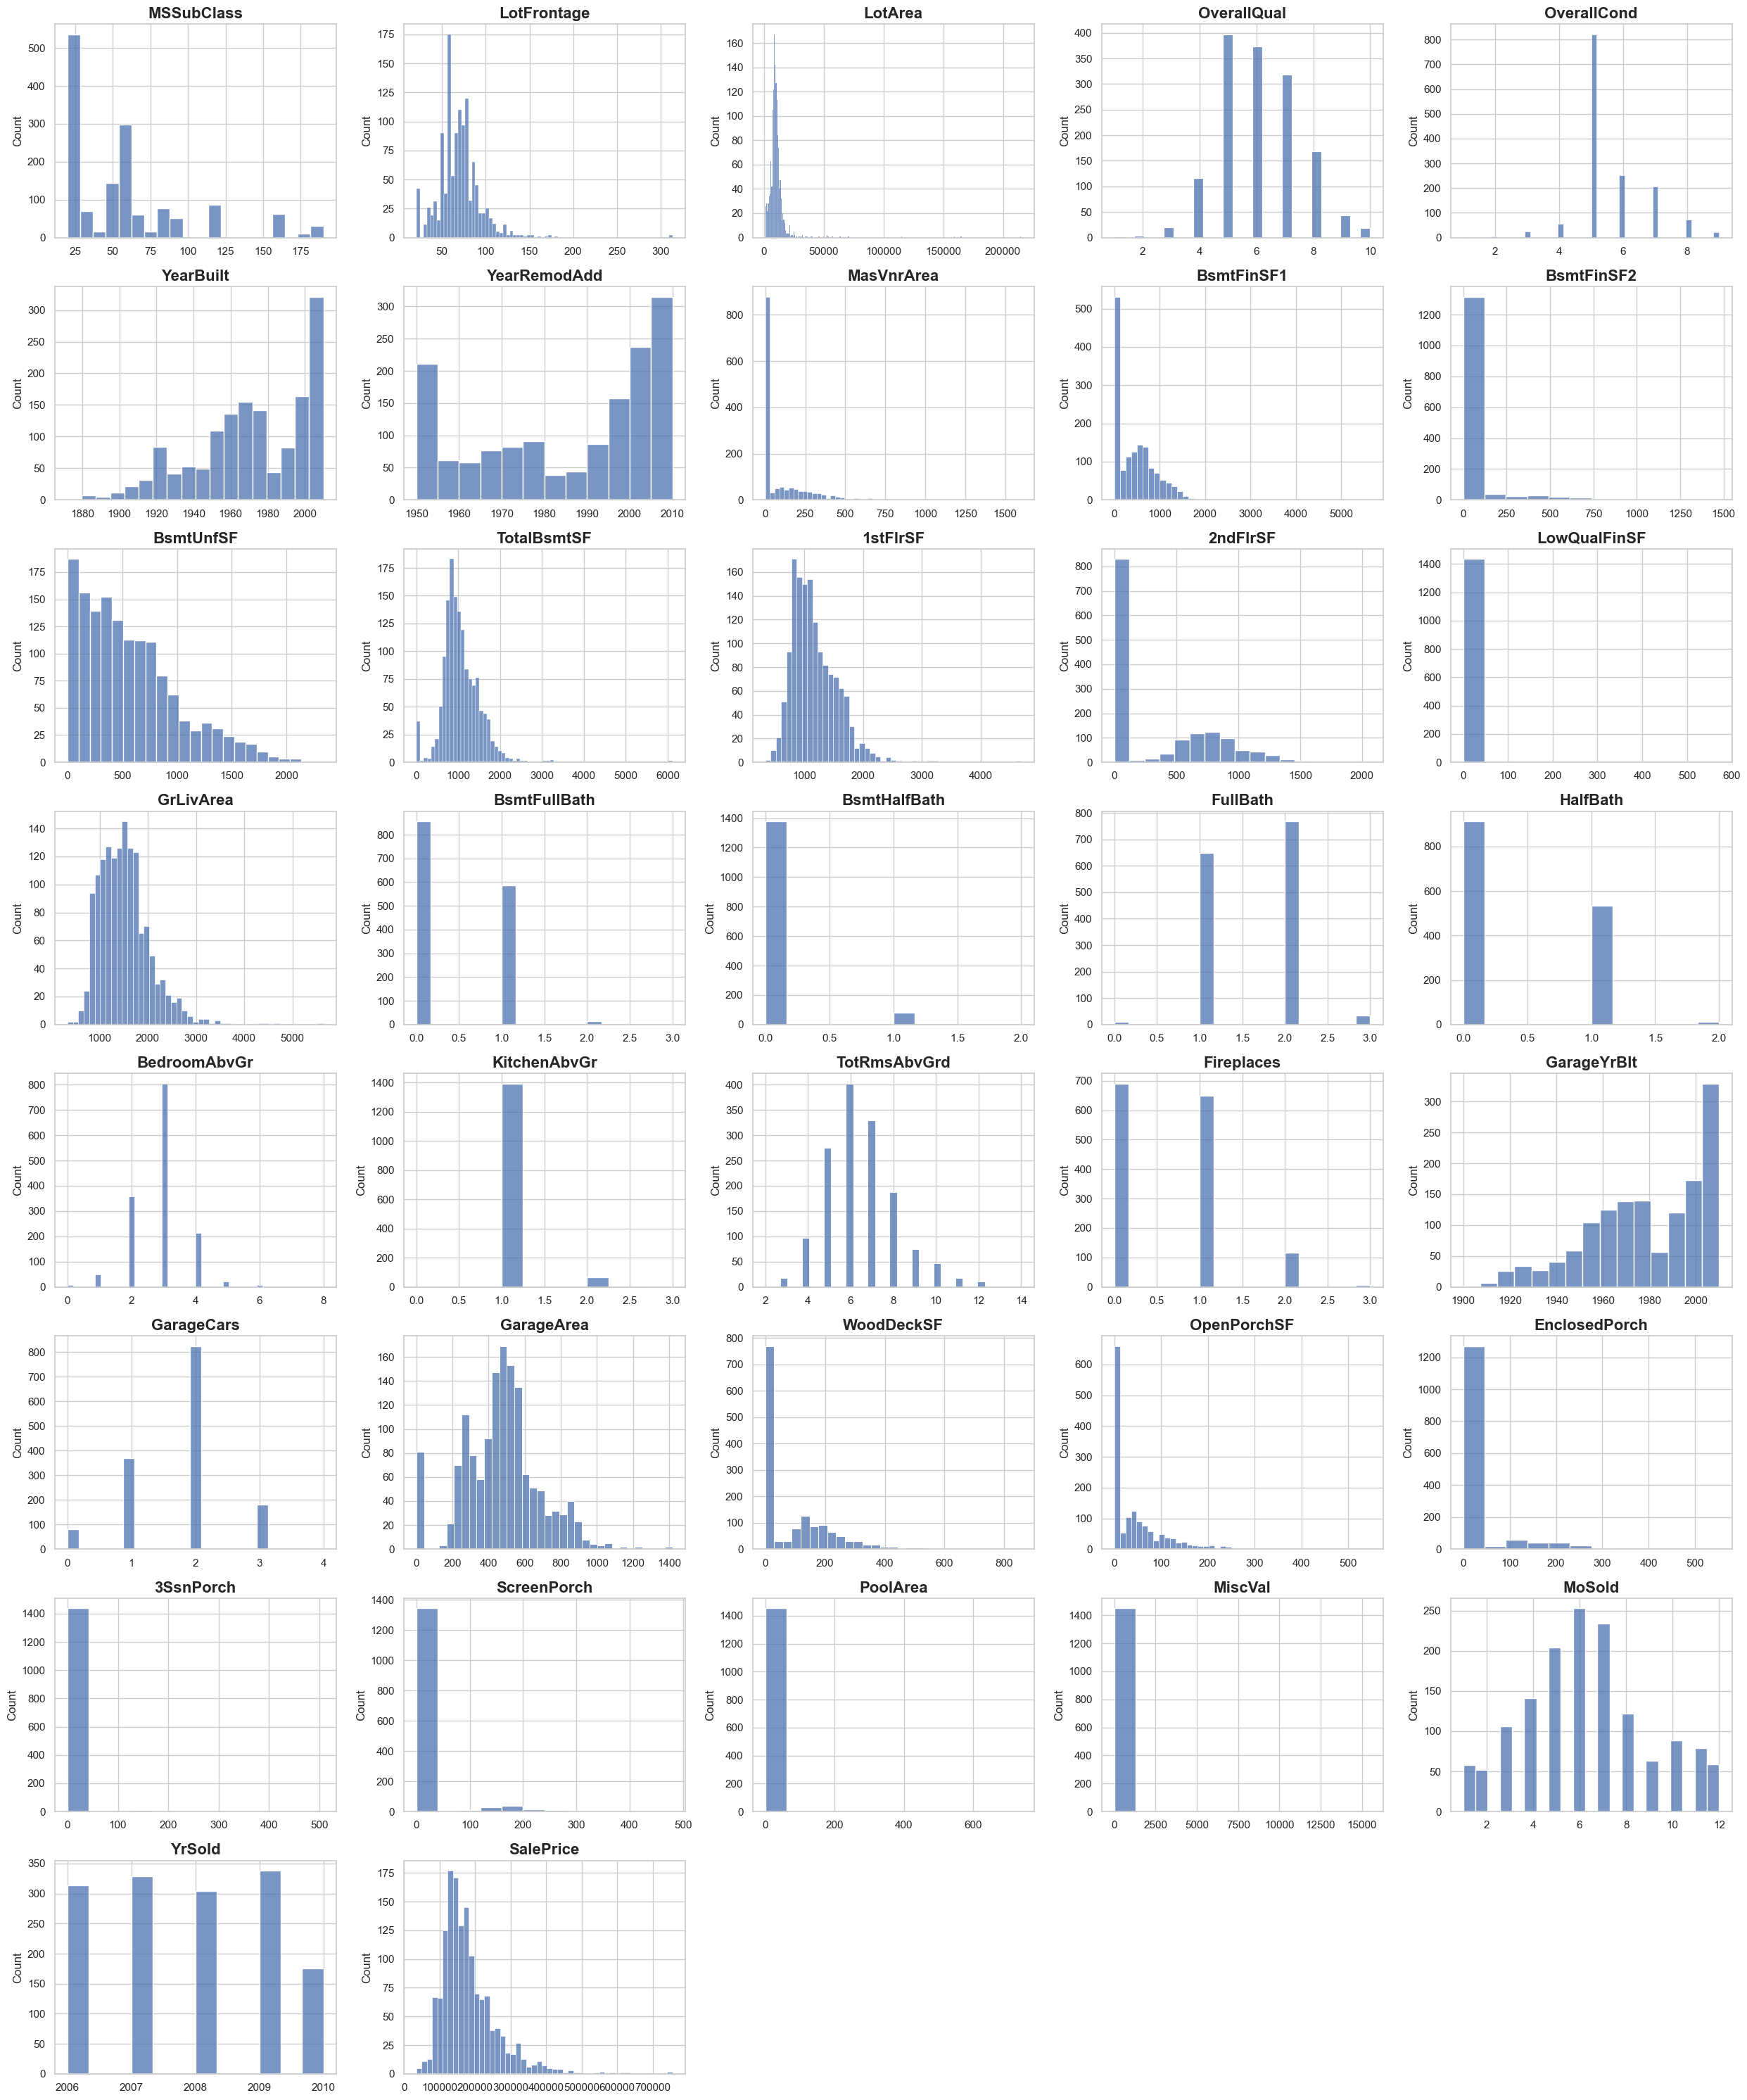

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(25,30))
l = len(numerical_data.columns)
for i in range(l):
    plt.subplot((l//5)+1, 5, i+1)
    sns.histplot(numerical_data[numerical_data.columns[i]])
    plt.title(numerical_data.columns[i],fontsize=16, fontweight='bold')
    plt.xlabel("")
plt.tight_layout()
plt.show()


### **Show corrwlation between features**

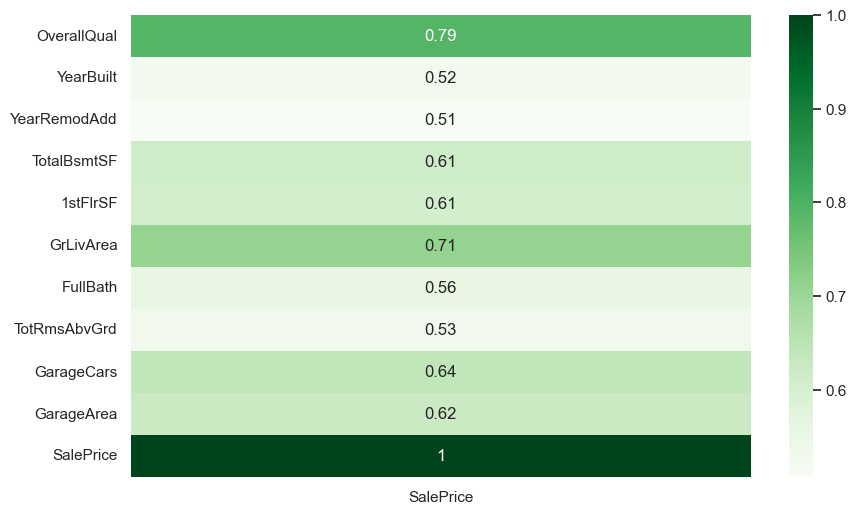

In [11]:
corr = numerical_data.corr()[['SalePrice']]
corr = corr[corr>0.5]
corr = corr.dropna()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

**Now we will search for columns that has a correlation more than 70% and drop one of them with the condition that the correlation with the target column (SalePrice) is smaller than another column**

In [12]:
# check the correlation for columns => GarageArea & GarageCars with the target
columns_corr= data[['GarageArea', 'GarageCars', 'SalePrice']].corr()
# columns_corr
print(columns_corr.loc['GarageArea', 'GarageCars'])
print(columns_corr.loc['GarageArea', 'SalePrice'])
print(columns_corr.loc['GarageCars', 'SalePrice'])

0.882475414281462
0.6234314389183622
0.6404091972583519


In [13]:
# check the correlation for columns => YearBuilt & GarageYrBlt with the target
columns_corr= data[['YearBuilt', 'GarageYrBlt', 'SalePrice']].corr()
# columns_corr
print(columns_corr.loc['YearBuilt', 'GarageYrBlt'])
print(columns_corr.loc['YearBuilt', 'SalePrice'])
print(columns_corr.loc['GarageYrBlt', 'SalePrice'])

0.8256674841743408
0.5228973328794967
0.4863616774878596


In [14]:
# check the correlation for columns => GrLivArea & TotRmsAbvGrd with the target
columns_corr= data[['GrLivArea', 'TotRmsAbvGrd', 'SalePrice']].corr()
# columns_corr
print(columns_corr.loc['GrLivArea', 'TotRmsAbvGrd'])
print(columns_corr.loc['GrLivArea', 'SalePrice'])
print(columns_corr.loc['TotRmsAbvGrd', 'SalePrice'])

0.8254893743088425
0.7086244776126515
0.5337231555820284


In [15]:
# check the correlation for columns => TotalBsmtSF & 1stFlrSF with the target
columns_corr= data[['TotalBsmtSF', '1stFlrSF', 'SalePrice']].corr()
# columns_corr
print(columns_corr.loc['TotalBsmtSF', '1stFlrSF'])
print(columns_corr.loc['TotalBsmtSF', 'SalePrice'])
print(columns_corr.loc['1stFlrSF', 'SalePrice'])

0.8195299750050339
0.6135805515591943
0.6058521846919153


In [16]:
# check the correlation for columns => 2ndFlrSF & GrLivArea with the target
columns_corr= data[['2ndFlrSF', 'GrLivArea', 'SalePrice']].corr()
# columns_corr
print(columns_corr.loc['2ndFlrSF', 'GrLivArea'])
print(columns_corr.loc['2ndFlrSF', 'SalePrice'])
print(columns_corr.loc['GrLivArea', 'SalePrice'])

0.6875010641666033
0.31933380283206736
0.7086244776126515


**Now we will drop columns 'GarageArea' ,'GarageYrBlt', 'TotRmsAbvGrd' and '1stFlrSF' becaus it has less correlation with the target column**

In [17]:
data = data.drop(columns=['GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF'])
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

**Define Features X and Target y**
- Set a variable X equal to the featuresand a variable y equal to the "SalePrice" column.

In [19]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

**Data Splitting**
- Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.2 and random_state=42

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1168, 71)
X_test shape:  (292, 71)
y_train shape:  (1168,)
y_test shape:  (292,)


## **Models**

### **1. LinearRegression**

- **Use "make_pipeline" model to create a pipeline with multiple stages. This stages contain (OneHotEncoder, SimpleImputer, LinearRegression)**
- **See this [link](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) for more information on how to use `make_pipeline` function**

In [21]:
object_cols = data.select_dtypes(include=['object']).columns
lr_model = make_pipeline(OneHotEncoder(cols=object_cols),SimpleImputer(), LinearRegression())
lr_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

### **Print LinearRegression Model Score**

In [22]:
print(f'Training Accuracy : {lr_model.score(X_train, y_train)}')
print(f'Test Accuracy : {lr_model.score(X_test, y_test)}')


Training Accuracy : 0.9340725380185854
Test Accuracy : -13725308.507409593


### **2. Ridge Regression**
- **Use "make_pipeline" model to create a pipeline with multiple stages. This stages contain (OneHotEncoder, SimpleImputer, RidgeRegression)**
- **See this [link](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) for more information on how to use `make_pipeline` function**

In [23]:
ridge_regression = make_pipeline(OneHotEncoder(cols=object_cols), SimpleImputer(), Ridge())
ridge_regression.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

### **Print Ridge model score**

In [24]:
print(f'Training score: {ridge_regression.score(X_train, y_train)}')
print(f'Test score: {ridge_regression.score(X_test, y_test)}')

Training score: 0.9192980651855865
Test score: 0.8890861294809601


### **3. Lasso**
- **Use "make_pipeline" model to create a pipeline with multiple stages. This stages contain (OneHotEncoder, SimpleImputer, LinearRegression)**
- **See this [link](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) for more information on how to use `make_pipeline` function**

In [25]:
lasso_model = make_pipeline(OneHotEncoder(cols=object_cols), SimpleImputer(), Lasso())
lasso_model.fit(X_train, y_train)

/Users/menna/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.290e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))),
                ('simpleimputer', SimpleImputer()), ('lasso', Lasso())])

### **Print Lasso model score**

In [26]:
print(f'Training score: {lasso_model.score(X_train, y_train)}')
print(f'Test score: {lasso_model.score(X_test, y_test)}')

Training score: 0.9340538201455054
Test score: 0.8993298191686566


### **Create a dataframe that contains test score for each model**

In [30]:
linear_score = lr_model.score(X_test, y_test)
ridge_score = ridge_regression.score(X_test, y_test)
lasso_score = lasso_model.score(X_test, y_test)
scores_df = pd.DataFrame(data=[['Linear', linear_score], ['Ridge', ridge_score], ['Lasso', lasso_score]], columns=['Model', 'Score'])
scores_df.sort_values(by='Score', ascending=False)

,Model,Score
2,Lasso,8.993298e-01
1,Ridge,8.890861e-01
0,Linear,-1.372531e+07
